_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

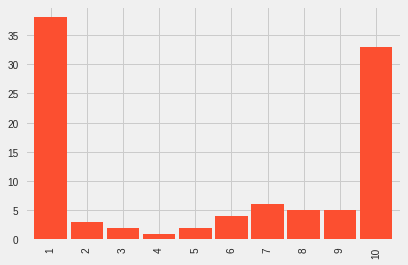

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

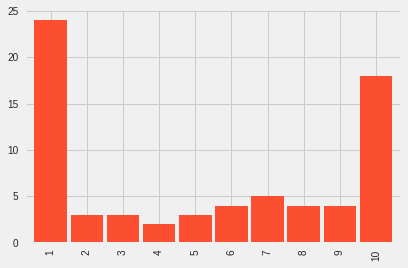

In [3]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

Text(0.5, 0, 'Rating')

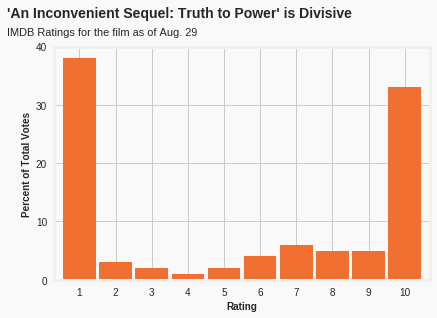

In [21]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9')
ax = fake.plot.bar(color='#ef7030', width=0.9)
ax.set(yticks=range(0,50,10), facecolor='#f9f9f9')
ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is Divisive", fontsize=14, fontweight='bold')
ax.text(x=-2, y=42, s='IMDB Ratings for the film as of Aug. 29', fontsize=11)
ax.tick_params(labelrotation=0)
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

In [11]:
display(example)

## Reproduce with real data

In [0]:
pd.options.display.max_columns = 500

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [28]:
df.head(20)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2
5,2017-07-17 12:28:33.970009,108,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.2,6.2,9,37,0,3,1,1,3,6,2,6,49,34.3,0.0,2.8,0.9,0.9,2.8,5.6,1.9,5.6,45.4
6,2017-07-17 12:28:34.199847,17,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.7,8.4,10,2,0,0,0,1,0,0,2,0,12,11.8,0.0,0.0,0.0,5.9,0.0,0.0,11.8,0.0,70.6
7,2017-07-17 12:28:34.381001,196,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,4.3,5.0,2,92,7,3,1,6,4,4,4,12,63,46.9,3.6,1.5,0.5,3.1,2.0,2.0,2.0,6.1,32.1
8,2017-07-17 12:28:34.590224,164,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,4.1,4.5,1,85,6,3,1,5,3,4,3,12,42,51.8,3.7,1.8,0.6,3.0,1.8,2.4,1.8,7.3,25.6
9,2017-07-17 12:28:34.807101,25,Females Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-fe...,7.2,8.2,10,5,0,0,0,0,0,0,0,0,20,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0


In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df.set_index('timestamp', inplace=True)

In [0]:
lastday = df['2017-08-29']

In [37]:
lastday.head(20)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [0]:
final = lastday[lastday['category'] == 'IMDb users'].tail(1)

In [41]:
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct', '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

In [43]:
final[pct_columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [47]:
data = final[pct_columns].T
data.index = range(1,11)
data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


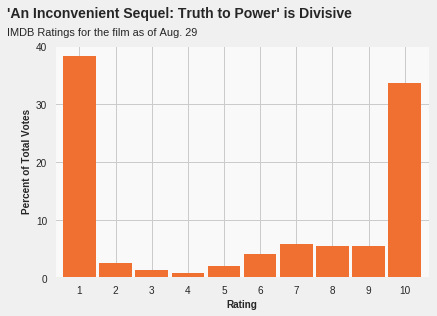

In [58]:
plt.style.use('fivethirtyeight')

fig.patch.set_facecolor('#f9f9f9')

ax = data.plot.bar(color='#ef7030', width=0.9)
ax.set(yticks=range(0,50,10), facecolor='#f9f9f9')
ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is Divisive", fontsize=14, fontweight='bold')
ax.text(x=-2, y=42, s='IMDB Ratings for the film as of Aug. 29', fontsize=11)
ax.tick_params(labelrotation=0)
ax.get_legend().remove()
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.show()

In [50]:
display(example)

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [62]:
#Source article/URL: https://fivethirtyeight.com/features/how-qi-and-za-changed-scrabble/

#Attempt to re-create this scrabble chart:

pic1 = Image(url='https://fivethirtyeight.com/wp-content/uploads/2017/04/roeder-scrabble-1.png?w=575')

display(pic1)

In [85]:
url = 'https://media.githubusercontent.com/media/fivethirtyeight/data/master/scrabble-games/scrabble_games.csv'
scrabble = pd.read_csv(url)
scrabble.head()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
0,1,1,False,268,Harriette Lakernick,0,1568,1684,1,429,Patricia Barrett,0,1915,1872,3,1,1,1998-12-06,False
1,2,1,False,268,Harriette Lakernick,0,1568,1684,1,435,Chris Cree,0,1840,1798,6,2,1,1998-12-06,False
2,3,1,False,268,Harriette Lakernick,0,1568,1684,1,441,Caesar Jaramillo,0,1622,1606,10,3,1,1998-12-06,False
3,4,1,False,268,Harriette Lakernick,0,1568,1684,1,456,Mike Chitwood,0,1612,1600,9,4,1,1998-12-06,False
4,5,1,False,268,Harriette Lakernick,0,1568,1684,1,1334,Nancy Scott,0,1537,1590,4,6,1,1998-12-06,False


In [87]:
scrabble.shape

(1542642, 19)

In [0]:
#columns to keep:
cols = ['tie', 'winnerscore', 'loserscore', 'date', 'lexicon']

scrabble = scrabble[cols]
scrabble = scrabble[scrabble['winnerscore'] != 0]
scrabble = scrabble[scrabble['loserscore'] != 0]


In [134]:
'''maximum value counts for any score, winner or loser, is well below the 10k in 
the first graph: Not sure why this data is different, but it results in my graph
looking quite different (in addition to the minor stylistic things I was unable 
to reproduce)'''

print(scrabble['winnerscore'].value_counts().head(1))
print(scrabble['loserscore'].value_counts().head(1))

401    6495
Name: winnerscore, dtype: int64
340    7024
Name: loserscore, dtype: int64


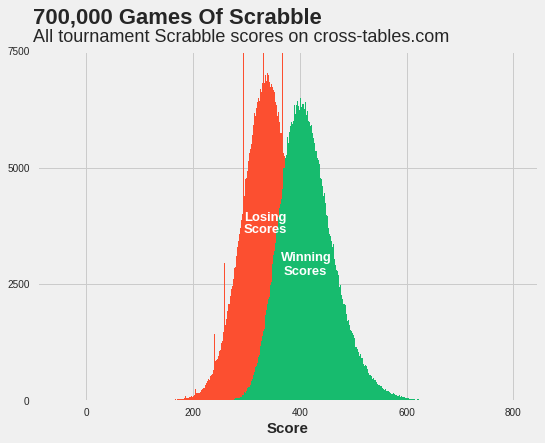

In [133]:
fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('fivethirtyeight')
ax.set(ylim=(0,7500), yticks=(0,2500,5000,7500))
ax.hist(scrabble['loserscore'], color= "#fc4f30", bins=600)
ax.hist(scrabble['winnerscore'], color="#17bb6e", bins= 800)
ax.text(x=-100, y=8100, s="700,000 Games Of Scrabble", fontsize=22, fontweight='bold')
ax.text(x=-100, y=7700, s='All tournament Scrabble scores on cross-tables.com', fontsize=18)
ax.text(x=295, y=3850, s='Losing', color='white', fontsize=13, fontweight='bold')
ax.text(x=294, y=3600, s='Scores', color='white', fontsize=13, fontweight='bold')
ax.text(x= 365, y= 3000, s='Winning', color='white', fontsize=13, fontweight='bold')
ax.text(x= 370, y= 2700, s='Scores', color='white', fontsize=13, fontweight='bold')
plt.xlabel('Score', fontsize=15, fontweight='bold')
plt.show()

In [140]:
#Attempt to recreate this second graph below:

pic2 = Image(url='https://fivethirtyeight.com/wp-content/uploads/2017/04/roeder-scrabble-2.png?w=575')

display(pic2)

In [0]:
scrabble['date'] = pd.to_datetime(scrabble['date'])

In [158]:
subset = scrabble[(scrabble.date > '2005-08-15') & (scrabble.date < '2006-09-15')].reset_index()

subset.shape

(51749, 6)

In [0]:
subset['week'] = subset['date'].dt.week
subset['combined'] = (subset['winnerscore'] + subset['loserscore']) // 2

In [0]:
avg_by_week = subset.groupby('week')['combined'].mean().reset_index()

In [0]:
avg_by_week = avg_by_week.rename(columns={'combined':'mean'})

subset = subset.merge(avg_by_week)

In [276]:
data = pd.DataFrame({'x':['2005-08-15', '2006-02-25'], 'y':[362, 372]})
data['x'] = pd.to_datetime(data['x'])

data


,x,y
0,2005-08-15,362
1,2006-02-25,372


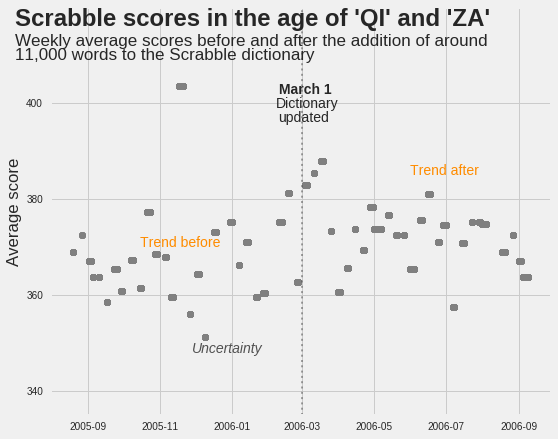

In [282]:
main_title = "Scrabble scores in the age of 'QI' and 'ZA'"
subtitle1 = 'Weekly average scores before and after the addition of around'
subtitle2 = '11,000 words to the Scrabble dictionary'
yticks = [340, 360, 380, 400]

fig, ax = plt.subplots(figsize=(8,7))
plt.style.use('fivethirtyeight')
ax.set(ylabel='Average score', ylim=(335,420))
plt.plot_date(subset.date, subset['mean'], marker='o', alpha=0.8, color='#808080')
ax.text(x='2005-07-01', y=416, s=main_title, fontsize=24, fontweight='bold')
ax.text(x='2005-07-01', y=412, s=subtitle1, fontsize=17)
ax.text(x='2005-07-01', y=409, s=subtitle2, fontsize=17)
ax.text(x= '2006-02-10', y=402, s='March 1', fontweight='bold', fontsize=14)
ax.text(x= '2006-02-07', y= 399, s='Dictionary', fontsize=14)
ax.text(x= '2006-02-09', y= 396, s='updated', fontsize=14)
ax.text(x='2005-10-15', y= 370, s='Trend before', color='#FF8C00', fontsize=14)
ax.text(x='2006-06-01' , y=385 , s='Trend after', color='#FF8C00', fontsize=14)
ax.text(x='2005-11-28', y=348, s='Uncertainty', fontsize=14, style='italic', color='#505050')
ax.axvline(x='2006-03-01', linestyle=':', alpha=0.5, linewidth=2, color='#505050')

#Not sure why this one doesnt show up: 
#ax.axvline(x='2006-01-05', linestyle='-', ymin=350, ymax=365, alpha=0.8, linewidth=2, color='#505050')


#This one def doesnt work:
#plt.plot(data) - AAARRGHHHH

plt.yticks(yticks)
plt.show()